# Lab 04 Notes

 * ENGR114
 * Fall 2022
 * 2022-10-20
 * Instructor Notes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import data and clear data

In [2]:
# show all the files in the same folder as this running jupyter notebook
# ensure the .xlsx data file is in the same direcotry as this jupyter notebook
%ls

govt_camp_2013_01_to_2016_03.xlsx  plot_with_two_lines.png
lab04_notes.ipynb                  week_04_notes.ipynb
plot_with_three_lines,png.png      week_04_notes_outline.ipynb


In [3]:
df = pd.read_excel("govt_camp_2013_01_to_2016_03.xlsx")
df.head()

,STATION,STATION_NAME,DATE,Precipitation\n(inches),Snow Depth\n(inches),Snowfall\n(inches),Max Temp (°F),Min Temp (°F)
0,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130101,0.00,44,0.0,29,12
1,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130102,0.01,42,0.0,27,11
2,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130103,0.00,42,0.0,20,12
3,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130104,0.16,41,0.0,31,14
4,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130105,0.00,41,0.0,37,28


In [4]:
# remove the STATION and STATION_NAME columns. Put date in 3 columns
# 1 col for year, 1 col for month, 1 col for day
df.drop(['STATION', 'STATION_NAME'], axis=1, inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.insert(0, 'year', pd.DatetimeIndex(df['DATE']).year)
df.insert(1, 'month', pd.DatetimeIndex(df['DATE']).month)
df.insert(2, 'day', pd.DatetimeIndex(df['DATE']).day)
df.drop(['DATE'], axis=1, inplace=True)
print(df.shape)
df.head()

(1186, 8)


,year,month,day,Precipitation\n(inches),Snow Depth\n(inches),Snowfall\n(inches),Max Temp (°F),Min Temp (°F)
0,2013,1,1,0.00,44,0.0,29,12
1,2013,1,2,0.01,42,0.0,27,11
2,2013,1,3,0.00,42,0.0,20,12
3,2013,1,4,0.16,41,0.0,31,14
4,2013,1,5,0.00,41,0.0,37,28


In [5]:
# create a NumPy array called wd from the dataframe df
wd = np.array(df)
print(wd)

[[2.013e+03 1.000e+00 1.000e+00 ... 0.000e+00 2.900e+01 1.200e+01]
 [2.013e+03 1.000e+00 2.000e+00 ... 0.000e+00 2.700e+01 1.100e+01]
 [2.013e+03 1.000e+00 3.000e+00 ... 0.000e+00 2.000e+01 1.200e+01]
 ...
 [2.016e+03 3.000e+00 2.900e+01 ... 0.000e+00 3.300e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.000e+01 ... 0.000e+00 4.700e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.100e+01 ... 0.000e+00 5.900e+01 3.200e+01]]


## Create a line plot

## Create a multi-line plot

## Create a figure with 4 subplots

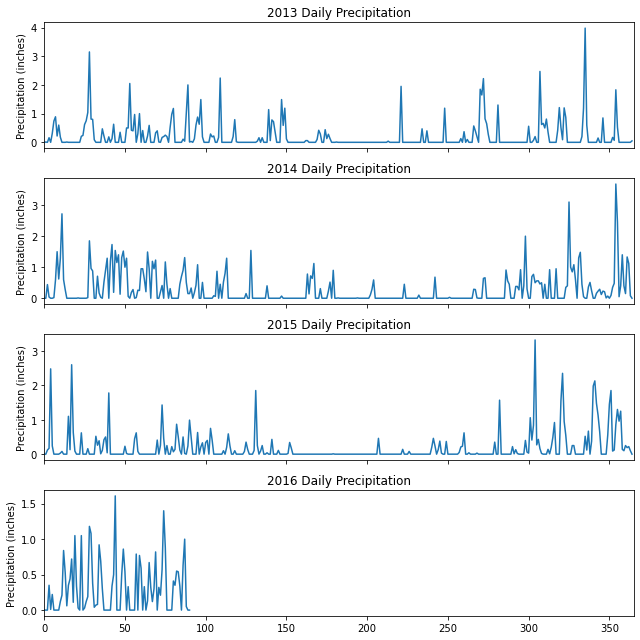

In [6]:
# Create 4 arrays, one array for each year of precipitation data
# years are: 2013,2014,2015,2016
# col index 0 contains the year
# col index 3 contains the precipitaiton
mask2013 = wd[:,0]==2013
mask2014 = wd[:,0]==2014
mask2015 = wd[:,0]==2015
mask2016 = wd[:,0]==2016

precip = wd[:,3] # pull out the precipitation column

precip2013 = precip[mask2013] # apply the mask to the precipitation column
precip2014 = precip[mask2014]
precip2015 = precip[mask2015]
precip2016 = precip[mask2016]

# fig, ax objects. total of 4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4,ncols=1, figsize=(9,9))

# plot the data and customize
ax1.plot(precip2013)
ax1.set_title("2013 Daily Precipitation")
ax1.set_ylabel("Precipitation (inches)")
ax1.set_xlim([0,365])
ax1.set_xticklabels([])

ax2.plot(precip2014)
ax2.set_title("2014 Daily Precipitation")
ax2.set_ylabel("Precipitation (inches)")
ax2.set_xlim([0,365])
ax2.set_xticklabels([])

ax3.plot(precip2015)
ax3.set_title("2015 Daily Precipitation")
ax3.set_ylabel("Precipitation (inches)")
ax3.set_xlim([0,365])
ax3.set_xticklabels([])

ax4.plot(precip2016)
ax4.set_title("2016 Daily Precipitation")
ax4.set_ylabel("Precipitation (inches)")
ax4.set_xlim([0,365])

# show the plots
plt.tight_layout()
plt.show()